<center><img src="picture.jpg" width="600" height="500" /></center>

# Single Element

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

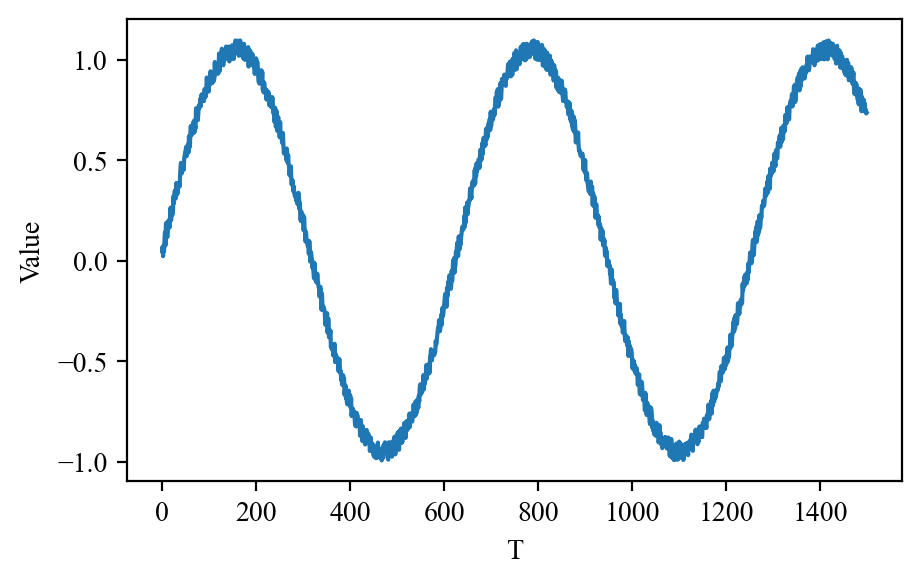

In [36]:
# Generate an array of values from 0 to 1500 with a step size of 1
t = np.arange(0, 1500)

# Generate an array of sine values for each value in t
x = np.sin(0.01*t)+(np.random.rand(1500,)/10)

# Create a new figure with a size of 5x3 inches and a resolution of 200 dpi
plt.figure(figsize=(5, 3), dpi=200)

# Plot the values of x
plt.plot(t,x)

# Label the x-axis as 'T'
plt.xlabel('T')

# Label the y-axis as 'Value'
plt.ylabel('Value')

# Display the plot
plt.show()

In [37]:
# Split data to train and test
interval=1000
train,test = x[0:interval], x[interval:]

# train= x[0:interval]
# test=x[interval:]

In [38]:
step = 10

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY =convertToDataset(train,step)
testX,testY =convertToDataset(test,step)

In [39]:
print(trainX.shape)
print(testX.shape)

(990, 10)
(490, 10)


In [40]:
# Import the RandomForestRegressor class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor class with specified hyperparameters
regr = RandomForestRegressor(n_estimators=200, max_depth=200, random_state=0)

# Fit the RandomForestRegressor model to the training data (trainX) and target values (trainY)
regr.fit(trainX, trainY)

RandomForestRegressor(max_depth=200, n_estimators=200, random_state=0)

In [41]:
pred=regr.predict(testX)

In [42]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(testY, pred, squared=False)
mse

0.03601605616568648

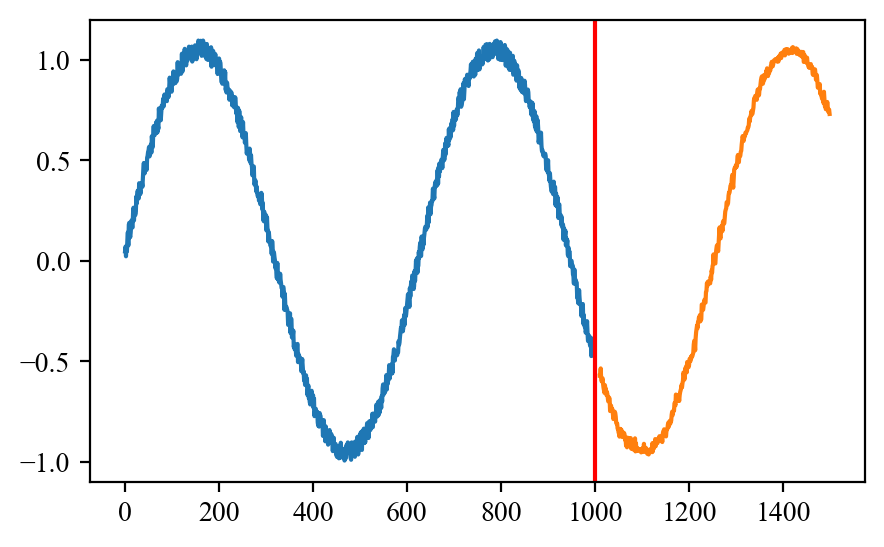

In [43]:
# Create a list of indexes for the new data points that start from (interval+step) and go up to 1500
x_new_indexes = [i for i in range(interval+step, 1500)]

# Use the fitted model (regr) to make predictions on the training data (trainX)
trainPredict = regr.predict(trainX)

# Use the fitted model (regr) to make predictions on the testing data (testX)
testPredict = regr.predict(testX)

# Concatenate the prediction results for both the training and testing data
predicted = np.concatenate((trainPredict, testPredict), axis=0)

# Creat a Figure
plt.figure(figsize=(5,3),dpi=200)
# Plot the original data for the range from 0 to interval
plt.plot(x[0:interval])

# Plot the predicted data for the range starting from x_new_indexes and the corresponding predicted values from interval-step onwards
plt.plot(x_new_indexes, predicted[interval-step:])

# Add a vertical line at the interval point to separate the training and testing data
plt.axvline(interval, c="r")

# Display the plot
plt.show()


# Multi Element

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path = "E:/Deep Course/Weeks/W8/Data/jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [3]:
df.shape

(420551, 15)

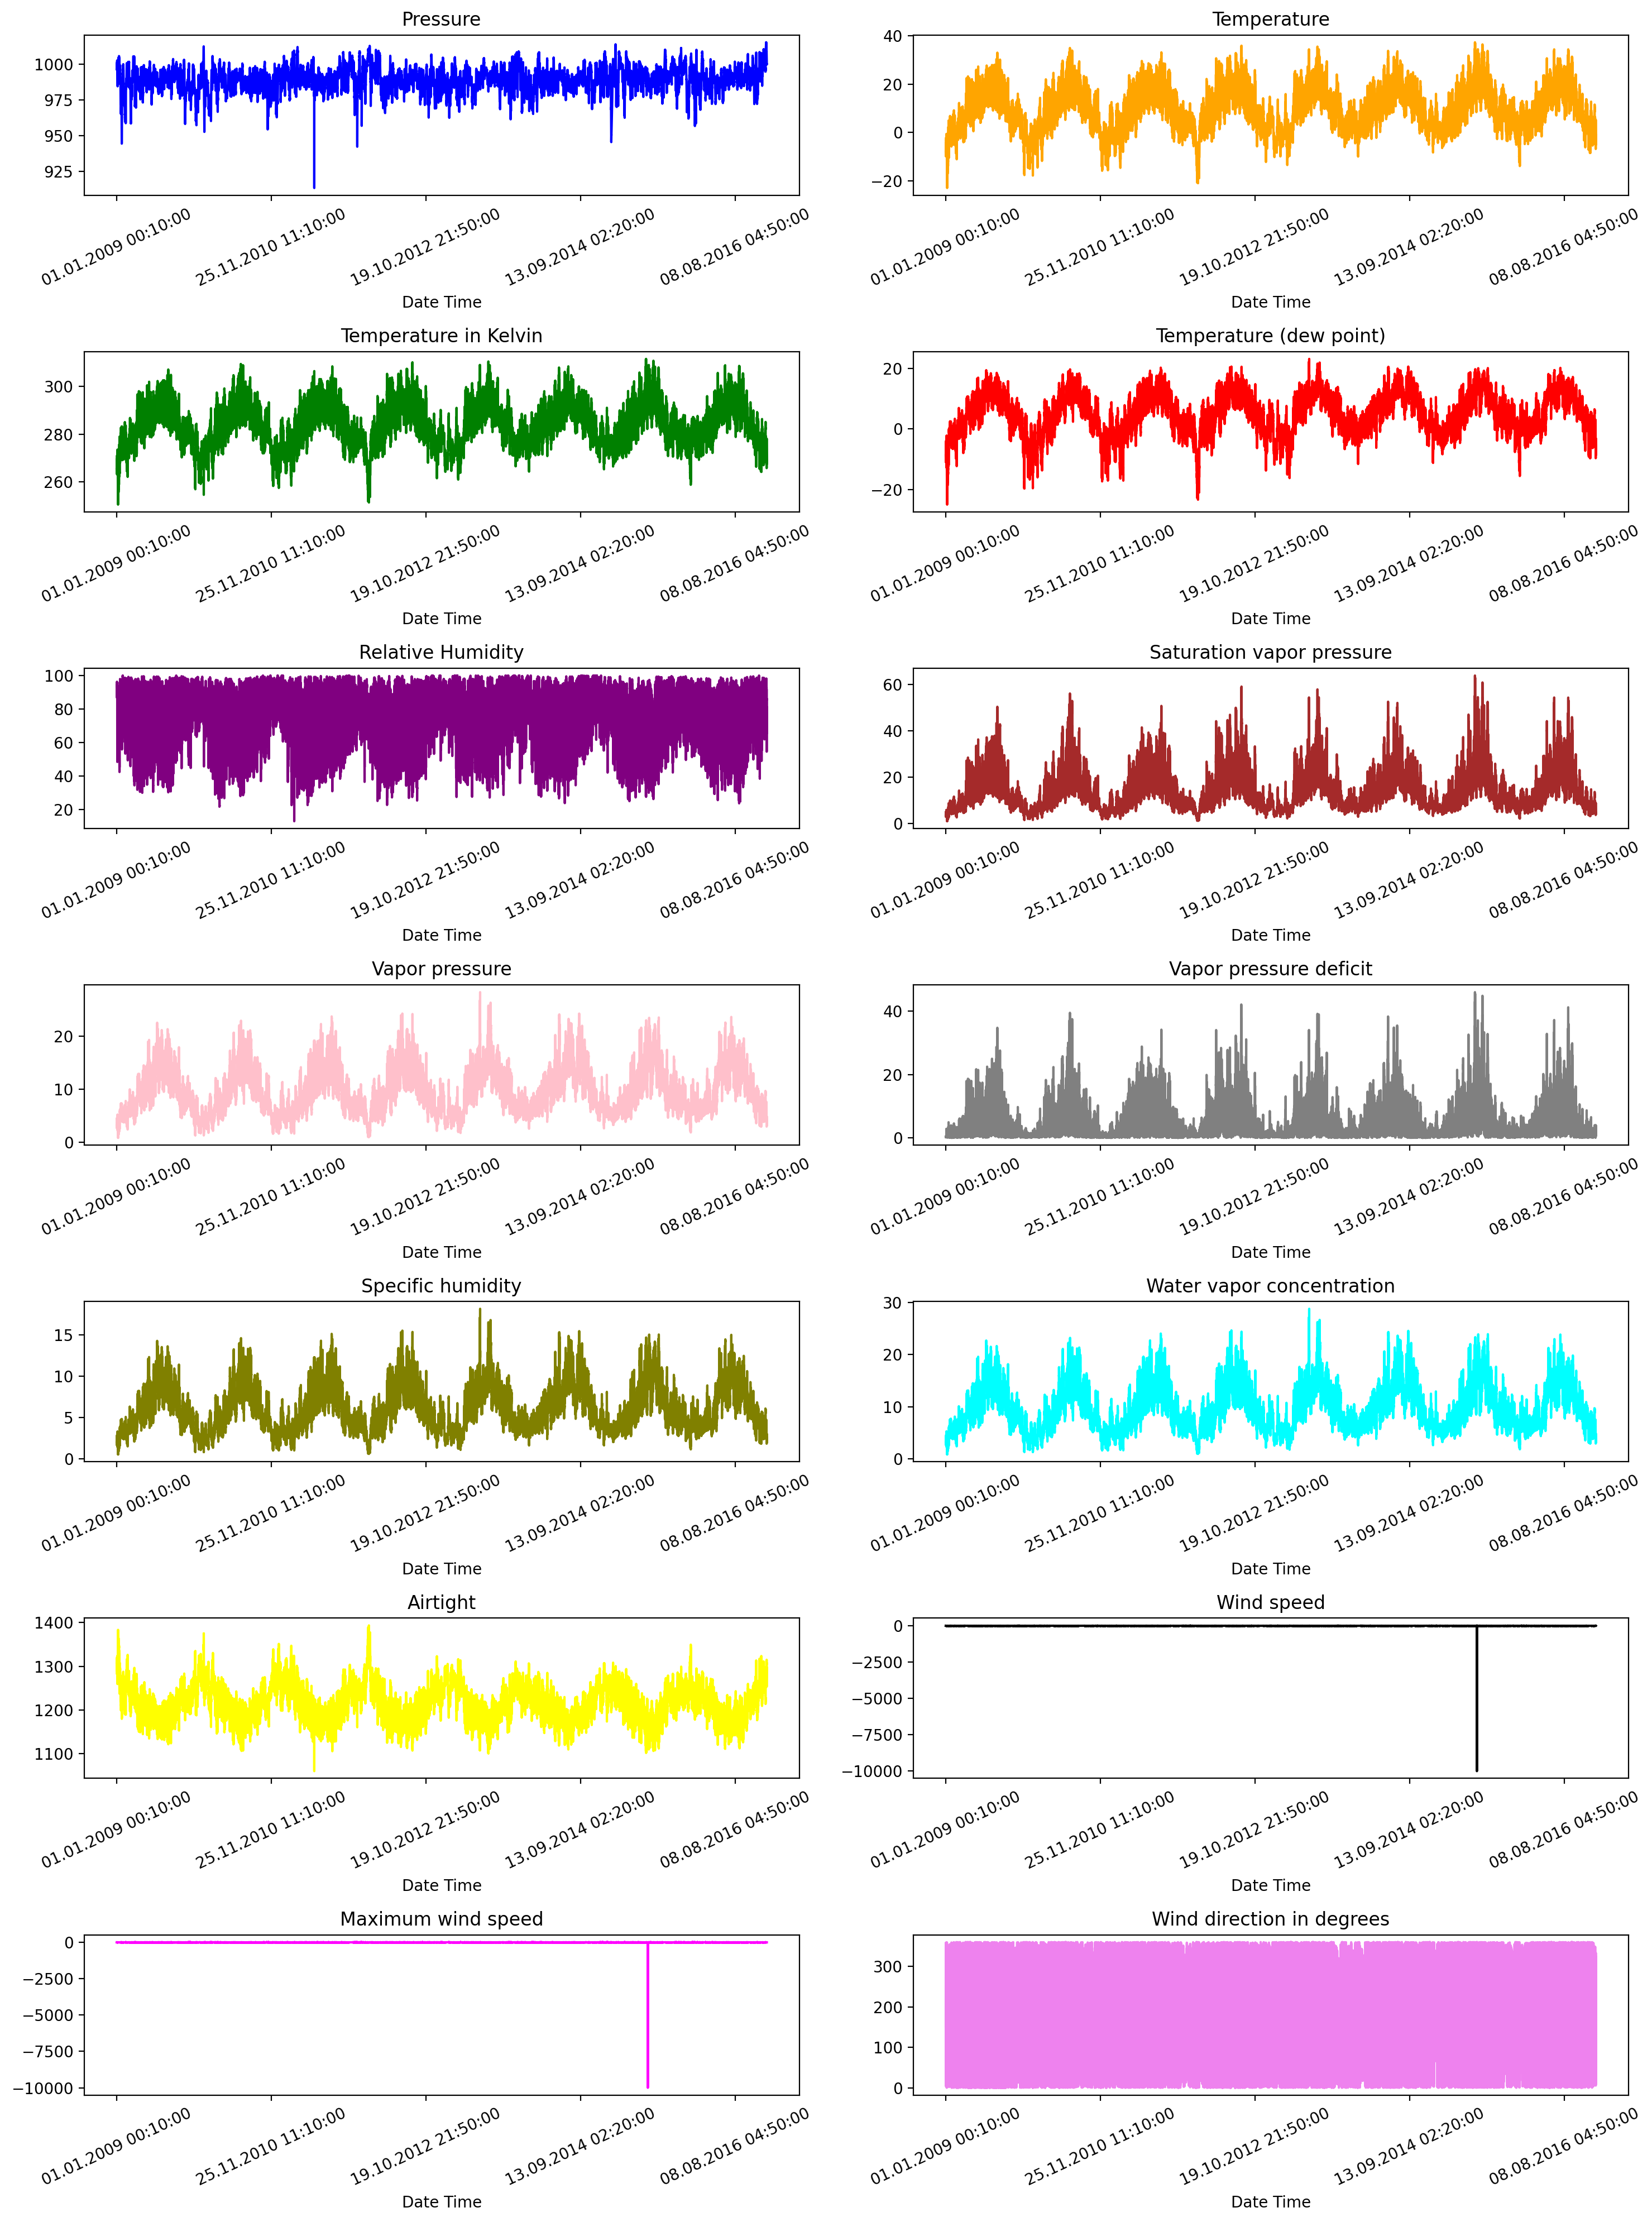

In [4]:
 # List of titles for each plot
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

# List of feature keys corresponding to each plot
feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

# List of colors for each plot
colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "yellow",
    "black",
    "magenta",
    "violet",
]

# Extracting the time data from the dataframe
time_data = df["Date Time"]

# Creating the figure for the plots
plt. figure(figsize=(15,20),dpi=200)

# Variable to keep track of the plot number
c=1

# Creating the subplots and plotting the data for each feature key
for i in range(7):
    for j in range(2):
        
        # Getting the current feature key and corresponding data
        key=feature_keys[c-1]
        t_data = df[key]
        t_data.index = time_data
        
        # Creating the subplot and plotting the data
        plt. subplot(7,2,c)
        t_data. plot(color=colors[c-1],rot=25,title=titles[c-1])
        
        c=c+1
        
# Adjusting the layout and displaying the plots
plt. tight_layout()
plt. show()

In [12]:
step=10
n_samples=df.shape[0]-step

input_features = [
    "p (mbar)",
    "T (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

n_feature=len(input_features)*step
input_array=np.zeros((n_samples,n_feature),dtype='float32')
label_array=np.zeros((n_samples,1),dtype='float32')

def normalize(data):

    data=np.array(data)
    
    data_mean = data.mean()
    data_std = data.std()
    return (data - data_mean) / data_std


# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step

        X.append(data[i:d])
        Y.append(data[d])
    return np.array(X), np.array(Y)

c=0
for f in input_features:

    input_=list(df[f])

    input_=normalize(input_)
    
    trainX,trainY =convertToDataset(input_,step)

    start_index=c*step
    end_index=(c+1)*step
    input_array[:,start_index:end_index]=trainX

    if f=="T (degC)":
        label_array=trainY
        
    c=c+1
  

In [13]:
train_percentatge=0.95
split_index=int(input_array.shape[0]*train_percentatge)


trainX=input_array[0:split_index]
trainY=label_array[0:split_index]

testX=input_array[split_index:]
testY=label_array[split_index:]

print(trainX.shape)
print(testX.shape)

(399513, 120)
(21028, 120)


In [14]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(random_state=0)
regr.fit(trainX, trainY)

DecisionTreeRegressor(random_state=0)

In [15]:
pred=regr.predict(testX)

from sklearn.metrics import mean_squared_error

mse=mean_squared_error(testY, pred, squared=False)
mse

0.03243872924232856

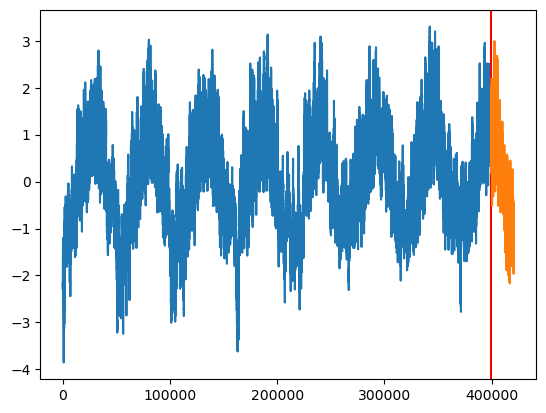

In [16]:
x_new_indexes=[i for i in range(split_index-step,input_array.shape[0])]
trainPredict = regr.predict(trainX)
testPredict= regr.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

#Plot predicted data
plt.plot(label_array[0:split_index])
plt.axvline(split_index, c="r")
plt.plot(x_new_indexes,predicted[split_index-step:])

plt.show()